# Mattplotlib Demo

This notebook demonstrates examples for each supported backend:
- Matplotlib (static)
- Seaborn (static, with theming)
- Plotly (interactive)

The package applies a consistent font, colour cycle, and Matplotlib style sheet.

In [82]:
from mattplotlib.style import apply_mpl_style
from mattplotlib.config import load_config, get_palette
apply_mpl_style("./mattplotlib/styles/mattplotlib.mplstyle")
load_config("config.example.toml")

MattplotlibConfig(font_family='Andale Mono', color_cycle=('#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02', '#A90E0E', '#559EE6', '#6D4444', '#9A9A9A'), palettes={'blues': ('#0f3d73', '#165b92', '#1e78b1', '#3d90c4', '#63a9d5', '#8cc1e3', '#b4d7ee', '#caeaf9', '#d9ebf6'), 'reds': ('#7d121b', '#a01923', '#c4252f', '#e02b35', '#e8575e', '#f08086', '#f6a8ad', '#ebbbbe', '#fbcdd0'), 'golds': ('#6f4b00', '#916103', '#b27607', '#d38d0f', '#e7a53b', '#f0c571', '#f5d292', '#f8dfb0', '#fbe9cc'), 'teals': ('#0d585c', '#0f716f', '#118a82', '#139f94', '#32b2a5', '#58c3b7', '#83d3c9', '#afe3db', '#d9f2ed'), 'purples': ('#502a57', '#633369', '#763d7c', '#8a478f', '#9d52a1', '#af68b0', '#c186c1', '#d3a4d3', '#e6c3e6'), 'greys': ('#2b2e31', '#3f454b', '#596269', '#778086', '#98a4aa', '#b8c2c7', '#d0d8dc', '#e3eaeb', '#eff5f6')}, seaborn_theme={'style': 'whitegrid', 'context': 'talk', 'palette': ['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02', '#A90E0E', '#559EE6', '#6

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Using named palettes
You can access any custom palette defined under `[mattplotlib.palettes]` in your TOML config with `get_palette(name)`.

In [107]:
colours = ["blues", "reds", "golds", "teals", "purples", "greys"]
palettes = {}

for c in colours:
    palettes[c] = get_palette(c)
    print(f"{c}: {get_palette(c)}")

blues: ('#0f3d73', '#165b92', '#1e78b1', '#3d90c4', '#63a9d5', '#8cc1e3', '#b4d7ee', '#caeaf9', '#d9ebf6')
reds: ('#7d121b', '#a01923', '#c4252f', '#e02b35', '#e8575e', '#f08086', '#f6a8ad', '#ebbbbe', '#fbcdd0')
golds: ('#6f4b00', '#916103', '#b27607', '#d38d0f', '#e7a53b', '#f0c571', '#f5d292', '#f8dfb0', '#fbe9cc')
teals: ('#0d585c', '#0f716f', '#118a82', '#139f94', '#32b2a5', '#58c3b7', '#83d3c9', '#afe3db', '#d9f2ed')
purples: ('#502a57', '#633369', '#763d7c', '#8a478f', '#9d52a1', '#af68b0', '#c186c1', '#d3a4d3', '#e6c3e6')
greys: ('#2b2e31', '#3f454b', '#596269', '#778086', '#98a4aa', '#b8c2c7', '#d0d8dc', '#e3eaeb', '#eff5f6')


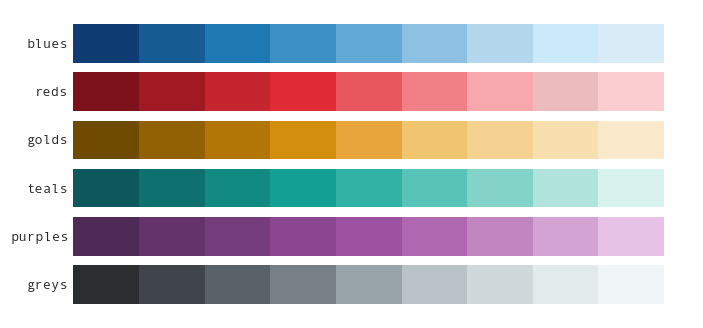

In [108]:
from mattplotlib.matplotlib_plots import display_palettes
display_palettes(colours)

## Matplotlib plot examples

### Nested donut plot

In [14]:
from mattplotlib.matplotlib_plots import plot_nested_donut

<Axes: >

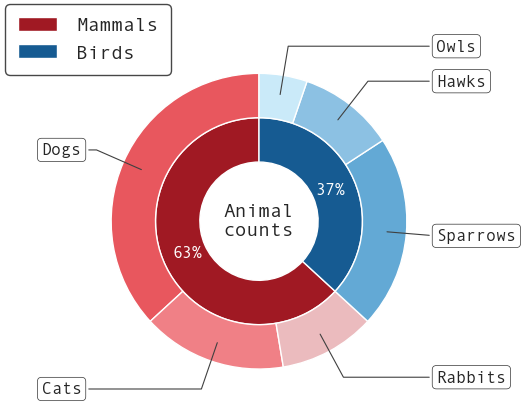

In [129]:
plot_nested_donut(
    outer_values=[
        [70, 30, 20], 
        [40, 20, 10], 
    ],
    outer_labels= [
        "Dogs", "Cats", "Rabbits", 
        "Sparrows", "Hawks", "Owls",
    ],
    inner_labels= [
        "Mammals", "Birds"
    ],
    inner_colors=[
        palettes['reds'][1],
        palettes['blues'][1]
    ],
    outer_colors=[
        palettes['reds'][4], palettes['reds'][5], palettes['reds'][7],
        palettes['blues'][4], palettes['blues'][5], palettes['blues'][7]
    ],
    center_text="Animal\ncounts",
    legend=True,
    outpath="./examples/nested_donut_demo_simple.png"
)

In [134]:
import pandas as pd
models_data = pd.read_csv("./examples/models_data.csv")

countries = [
    "United States of America",
    "China",
    "Other",
    "Multinational",
    "United Kingdom of Great Britain and Northern Ireland",
]
inner_values = [
    models_data['Country formatted'].value_counts().loc[countries].values
]
inner_labels = [
    "USA",
    "China",
    "Other",
    "Multinational",
    "UK",
]

domains_of_interest = models_data['Domain formatted'].value_counts().index.tolist()
outer_values = []
outer_labels = []

for country in countries:
    domain_counts = models_data[models_data['Country formatted'] == country]['Domain formatted'].value_counts()
    domain_counts = domain_counts.reindex(domains_of_interest, fill_value=0)
    #domain_counts = domain_counts[domain_counts > 0]
    outer_values.append(domain_counts.values)
    outer_labels.extend(domain_counts.index)

<Axes: >

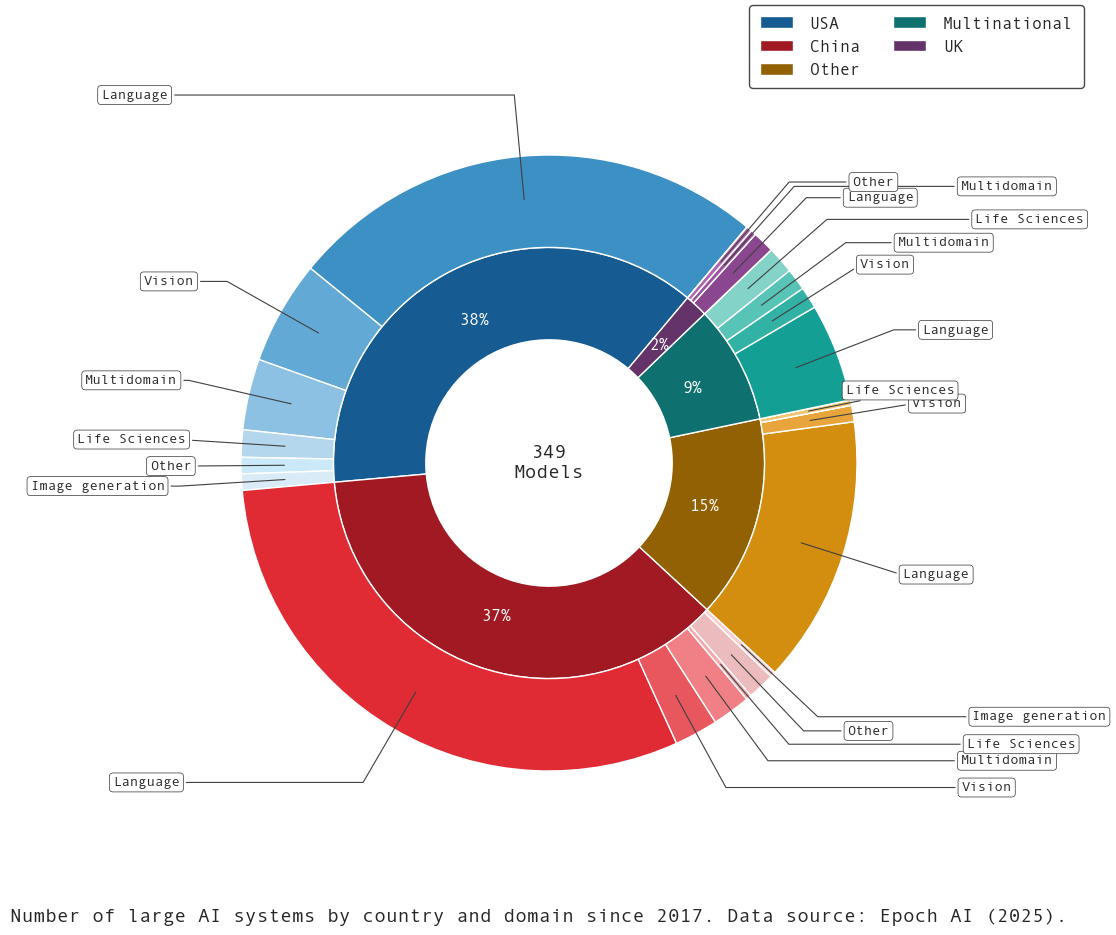

In [140]:
plot_nested_donut(
    outer_values=outer_values,
    outer_labels=outer_labels,
    inner_colors=[
        palettes['blues'][1],
        palettes['reds'][1],
        palettes['golds'][1],
        palettes['teals'][1],
        palettes['purples'][1],
    ],
    outer_colors=[
        palettes['blues'][3], palettes['blues'][4], palettes['blues'][5], palettes['blues'][6], palettes['blues'][7], palettes['blues'][8],
        palettes['reds'][3], palettes['reds'][4], palettes['reds'][5], palettes['reds'][6], palettes['reds'][7], palettes['reds'][8],
        palettes['golds'][3], palettes['golds'][4], None, palettes['golds'][5], None, None,
        palettes['teals'][3], palettes['teals'][4], palettes['teals'][5], palettes['teals'][6], None, None,
        palettes['purples'][3], None, palettes['purples'][4], None, palettes['purples'][5], None 
    ],
    startangle=50,
    inner_labels=inner_labels,
    legend=True,
    annotation_kwargs={"fontsize": 10},
    annotation_distance=1.2,
    randomise_annotation_x_pos=True,
    legend_kwargs={"bbox_to_anchor": (1.2, 1.1), "ncol": 2, "fontsize": 12, "loc": "upper right"},
    figsize=(10, 10),
    center_text=f"{models_data.shape[0]}\nModels",
    caption='Number of large AI systems by country and domain since 2017. Data source: Epoch AI (2025).',
    caption_kwargs={"x": -0.2},
    outpath="./examples/nested_donut_demo.png"
)


### Venn diagram

In [127]:
from mattplotlib.matplotlib_plots import plot_venn

<Axes: >

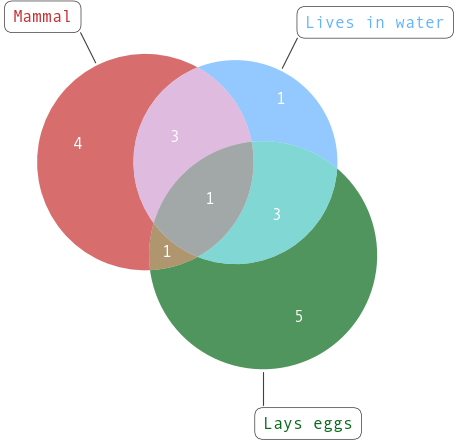

In [128]:
mammals = {
    "dog",
    "cat",
    "rabbit",
    "dolphin",
    "orca",
    "bat",
    "otter",
    "platypus",
    "anteater",
}
lays_eggs = {
    "sparrow",
    "owl",
    "fish",
    "frog",
    "turtle",
    "lizard",
    "dragonfly",
    "butterfly",
    "platypus",
    "anteater",
}
live_in_water = {
    "fish",
    "frog",
    "turtle",
    "platypus",
    "dolphin",
    "otter",
    "orca",
    "great white",
}

plot_venn(
    sets=[mammals, live_in_water, lays_eggs],
    set_labels=["Mammal", "Lives in water", "Lays eggs"],
    colors=["#c62f2f", "#66b3ff", "#066918"],
    alpha=0.7,
    outpath="./examples/venn_demo.png"
)